In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit, expit
import scipy.stats

# 1) Normal distribution

In [2]:
df = pd.DataFrame(columns = None)
df['default_normal'] = np.random.normal(size=10000)
df['normal_m_8_sd_15'] = np.random.normal(loc=8, scale=15, size=10000)
df['normal_m_8_sd_3'] = np.random.normal(loc=8, scale=3, size=10000)

In [3]:
df_melted = df.melt()

## Different variance and mean
### 16 bins

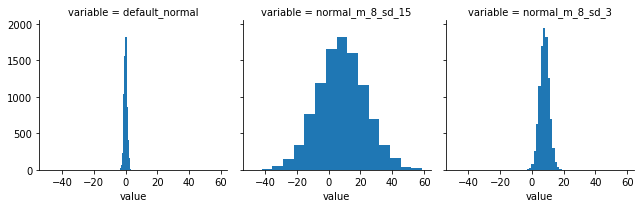

In [4]:
fGrid=sns.FacetGrid(df_melted, col="variable", sharex=True, col_wrap=3)
fGrid.map(plt.hist,"value",cumulative=False,bins=16)

### 128 bins

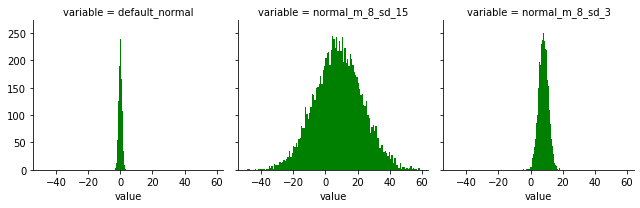

In [5]:
fGrid_128=sns.FacetGrid(df_melted, col="variable", sharex=True, col_wrap=3)
fGrid_128.map(plt.hist,"value", cumulative=False, bins=128, color='g')

#### /// If variance is low the number of bins also should be low. In another case the plot becomes not so informative.

### Cumulative 128 bins

In [6]:
type(df_melted)

pandas.core.frame.DataFrame

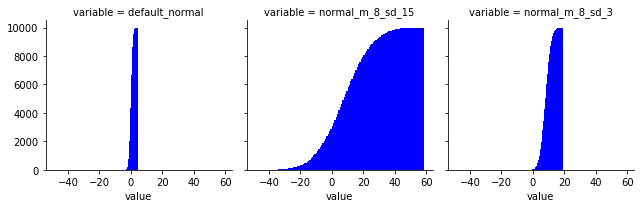

In [7]:
fGrid_128=sns.FacetGrid(df_melted, col="variable", sharex=True, col_wrap=3)
fGrid_128.map(plt.hist,"value", cumulative=True, bins=128, color='b')

# 2) Normal distribution - inverse logit

In [8]:
expit_melted = pd.DataFrame(df_melted['variable'])
expit_melted['value'] = expit(df_melted['value'])

In [9]:
expit_melted.head()

,variable,value
0,default_normal,0.526871
1,default_normal,0.652460
2,default_normal,0.780452
3,default_normal,0.358713
4,default_normal,0.363407


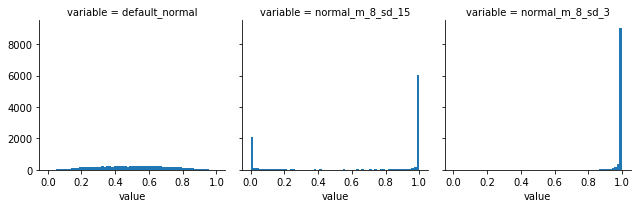

In [10]:
fGrid=sns.FacetGrid(expit_melted, col="variable", sharex=True, col_wrap=3)
fGrid.map(plt.hist,"value", cumulative=False, bins=64)

### Cumulative

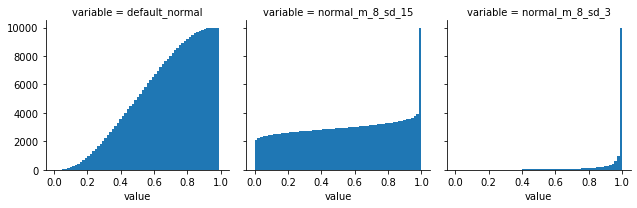

In [11]:
fGrid=sns.FacetGrid(expit_melted, col="variable", sharex=True, col_wrap=3)
fGrid.map(plt.hist,"value", cumulative=True, bins=64)

# 3) Poisson distribution

### Different lambdas

In [63]:
df_poisson = pd.DataFrame(columns = None)
s = np.random.poisson(lam=8, size=10000)
df_poisson['poiss_lam_2_size_10000'] = np.random.poisson(lam=2, size=10000)
df_poisson['poiss_lam_6_size_10000'] = np.random.poisson(lam=6, size=10000)
df_poisson['poiss_lam_18_size_10000'] = np.random.poisson(lam=18, size=10000)
poisson_melted = df_poisson.melt()

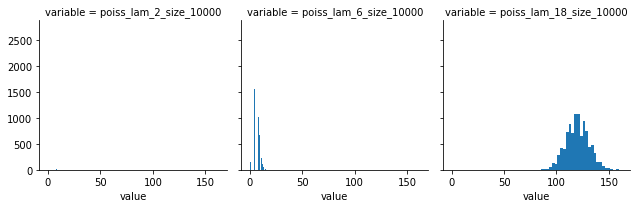

In [64]:
fGrid=sns.FacetGrid(poisson_melted, col="variable", sharex=True, col_wrap=3)
fGrid.map(plt.hist,"value",cumulative=False,bins=32)

##### /// If lambda is high (lambda > 15) the distribution shape is a bit simillar to normal distribution 

### Different sizes

In [61]:
df_1 = pd.DataFrame(np.random.poisson(lam=5, size=50))
df_2 = pd.DataFrame(np.random.poisson(lam=5, size=100))
df_3 = pd.DataFrame(np.random.poisson(lam=5, size=10000))

df_poisson = pd.concat([df_1,df_2,df_3], ignore_index=True, axis='columns')
df_poisson.columns = ["poiss_lam_5_size_100", "poiss_lam_5_size_1000", "poiss_lam_5_size_10000"]
poisson_melted = df_poisson.melt()

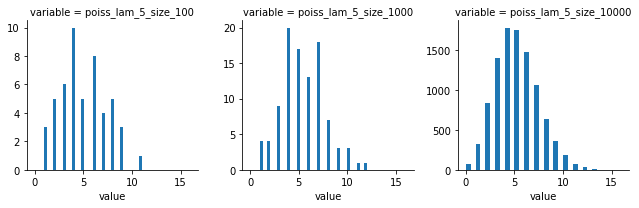

In [62]:
fGrid=sns.FacetGrid(poisson_melted, col="variable", sharex=True, sharey=False, col_wrap=3)
fGrid.map(plt.hist,"value",cumulative=False,bins=32)

##### /// If the size is too small the distribution shape is often different from expected - 

# 4) Beta distribution

In [83]:
df_beta = pd.DataFrame(columns = None)
df_beta['beta_a_0.8_b_0.4'] = np.random.beta(a=0.8,b=0.4,size=10000)
df_beta['beta_a_0.25_b_1.0'] = np.random.beta(a=0.25,b=1.0,size=10000)
df_beta['beta_a_2.0_b_2.0'] = np.random.beta(a=2.0,b=2.0,size=10000)
df_beta['beta_a_7.0_b_7.0'] = np.random.beta(a=7.0,b=7.0,size=10000)
beta_melted = df_beta.melt()

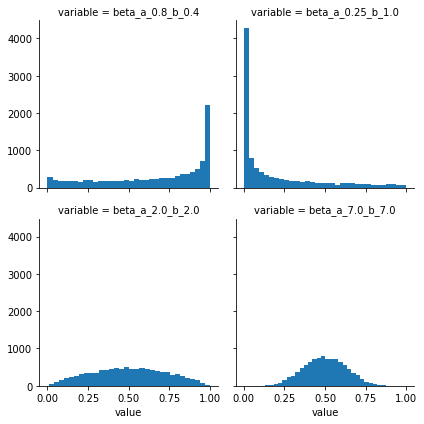

In [84]:
fGrid=sns.FacetGrid(beta_melted, col="variable", sharex=True, col_wrap=2)
fGrid.map(plt.hist,"value",cumulative=False, bins=32)

In [96]:
df_beta = pd.DataFrame(columns = None)
print(scipy.stats.beta(0.8, 0.4, 0.6,0.3,))
#df_beta['beta_a_0.25_b_1.0'] = scipy.stats.beta(a=0.25,b=1.0,size=10000)
#df_beta['beta_a_2.0_b_2.0'] = np.random.beta(a=2.0,b=2.0,size=10000)
#df_beta['beta_a_7.0_b_7.0'] = np.random.beta(a=7.0,b=7.0,size=10000)
beta_melted = df_beta.melt()

In [92]:
df_beta.head()

,beta_a_0.8_b_0.4


# 5) Log-normal distribution

In [102]:
df_lognormal = pd.DataFrame(columns = None)
df_lognormal["lognormal_default"] = np.random.lognormal(size=10000)
df_lognormal["lognormal_m=3_sd=0.3"] = np.random.lognormal(3,0.3,10000)
df_lognormal["lognormal_m=0_sd=0.5"] = np.random.lognormal(0,0.5,10000)
df_lognormal["lognormal_m=8_sd=2"] = np.random.lognormal(7,1.5,10000)
lognormal_melted = df_lognormal.melt()

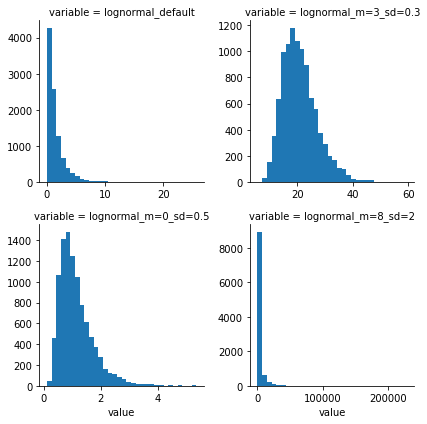

In [103]:
fGrid=sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=2)
fGrid.map(plt.hist, "value", cumulative=False, bins=32)

### Cumulative

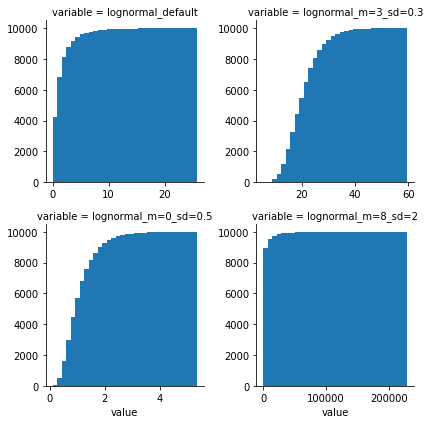

In [104]:
fGrid=sns.FacetGrid(lognormal_melted, col="variable", sharex=False, sharey=False, col_wrap=2)
fGrid.map(plt.hist, "value", cumulative=True, bins=32)